In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

<Axes: >

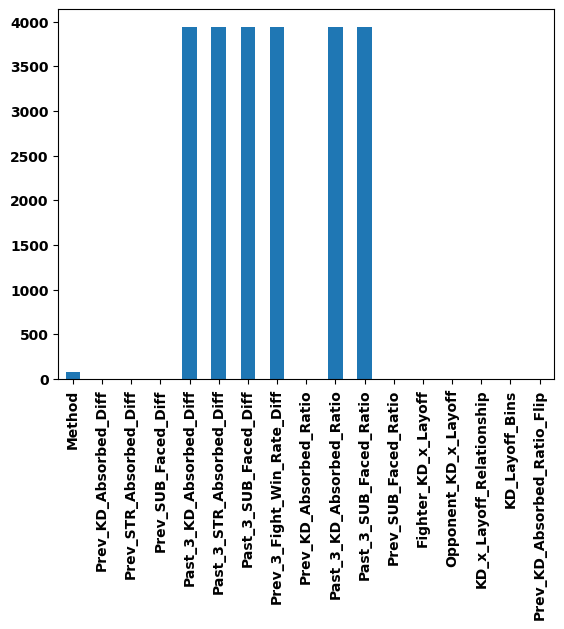

In [5]:
null_values = train.isna().sum()
null_values = null_values[null_values > 0]
null_values.plot(kind = "bar")

In [8]:
for df in [train, val, test]:
    df.rename(columns={"Fighter_x": "Fighter"}, inplace=True)

train = train.loc[:, ~train.columns.duplicated()].copy()
val   = val.loc[:, ~val.columns.duplicated()].copy()
test  = test.loc[:, ~test.columns.duplicated()].copy()



<Axes: >

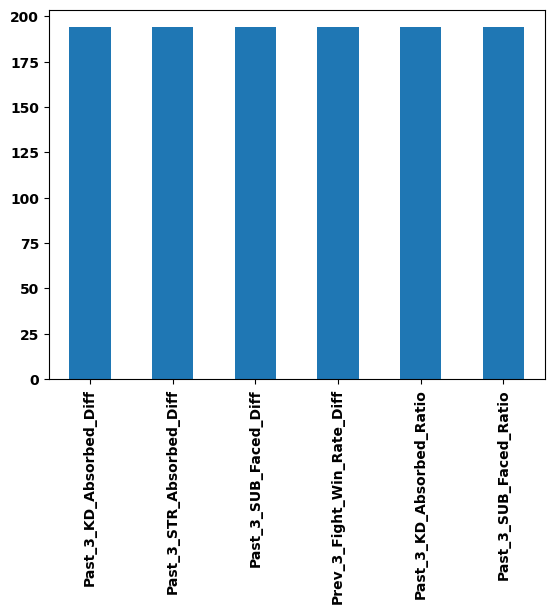

In [10]:
null_values = val.isna().sum()
null_values = null_values[null_values > 0]
null_values.plot(kind = "bar")

In [12]:
val

,Unnamed: 0.1,key_0,index,Unnamed: 0_x,Date,Fighter,Opponent,Closed_Stance,Weight_class_lbs,Is_Winner_x,Method,Prev_3_Stats_Missing,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,TD Avg.:_Style,SLpM:_Style,Sub. Avg.:_Style,TD Acc.:_Style,TD_Acc_x_Avg_SUB_Style,SApM:_Style,Grappling_Threat_Style,Str. Acc.:_Style,TD Def.:_Style,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str. Def:_Style,Volume_x_Accuracy_Style,Current_Win_Streak_Comparison,Volume_x_Accuracy_x_KO%_Style,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,SLpM_Bin,VolumeAcc_Bin,SApM_Bin,Overall_Stat_Interactions,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions_Fighter,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Current_Win_Streak_Bins,Wins_By_KO_%_Bins,StrDef_vs_OppStrDanger_Bin,TDD_vs_Opp_Grappling_Bin,Overall_Stat_Interactions_Bin,Str_Danger_vs_Opp_StrDef_Bin,Fighter_Grappling_vs_OppTDD_Bin,Overall_Stat_Interactions_Fighter_Bin,Overall_Win_%_Bin,Striking_Ratio,Grappling_Ratio,KD_x_Layoff_Relationship,KD_Layoff_Bins,Unnamed: 0_y,Fight Style_x,Ape_Ratio_x,BMI_x,Unnamed: 0,Fighter_y,Fight Style_y,Ape_Ratio_y,BMI_y,Ape_Ratio_Comparison,BMI_Ratio_Comparison,Ape_Ratio_Bins,Fight_Style_Matchup,Fight_Style_Matchup_BJJ_vs_BJJ,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Prev_KD_Absorbed_Ratio_Flip
0,0,0,1,1250.0,2024-02-17,Paulo Costa,Robert Whittaker,True,185 lbs.,False,DEC,False,-1.0,-11.0,0.0,-0.333333,40.666667,0.000000,322.0,1.0,0.000000,-9.0,-3.0,-1.0,0.0,-8.0,-2.0,0.0,-1.0,0.333333,0.000000,-0.333333,-0.100000,0.0000,0.100000,1.0,0.000000,1.68,0.15,3.15,-0.10,-0.44,0.37,-0.01,0.0,1.0,-1.0,1.000000,0.80,1.00,1.0,0.750000,0.750000,0.310345,0.578067,0.000000,0.663716,0.470382,0.657974,0.000000,0.574257,0.496894,0.223942,1.289665,0.453703,0.648872,0.999999,0.787050,0.983051,0.414365,3.0,3.0,3.0,1.356497,0.151470,1.386292,1.426364,5.637231,3.467159,1.0,2.0,1.0,3.0,2.0,0.0,3.0,3.0,0.0,0.907635,0.657675,0.619177,2.0,25.0,DangerousStriking/TDD,0.986301,24.407537,0,Robert Whittaker,DangerousStriking/TDD,1.013889,25.090233,0.493104,0.493104,-1.0,DangerousStriking/TDD_vs_DangerousStriking/TDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,6,928.0,2024-06-22,Ikram Aliskerov,Robert Whittaker,False,185 lbs.,False,KO,True,0.0,-55.0,0.0,NaN,NaN

In [14]:
prevkd = pd.read_csv("prevkdfix.csv")

<Axes: >

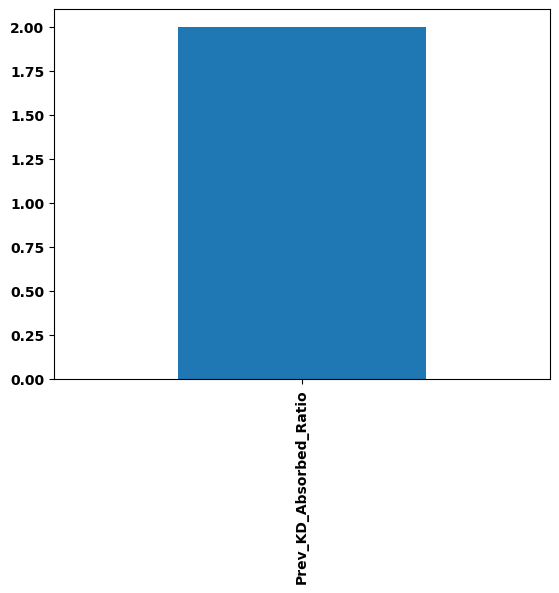

In [16]:
null_values = prevkd.isna().sum()
null_values = null_values[null_values > 0]
null_values.plot(kind = "bar")

In [18]:
newfeat = pd.read_csv("newfeatures.csv")

In [19]:
newfeat = newfeat[~((newfeat["SApM:_x"].isna()) | (newfeat["SApM:_y"].isna()))]
newfeat[newfeat["SApM:_y"].isna()]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,SLpM:_Style,Str. Acc.:_Style,SApM:_Style,Str. Def:_Style,TD Avg.:_Style,TD Acc.:_Style,TD Def.:_Style,Sub. Avg.:_Style,Current_Win_Streak_Comparison,Fighter_Volume_x_Accuracy_x_KO%,Opponent_Volume_x_Accuracy_x_KO%,Volume_x_Accuracy_x_KO%_Style,Fighter_Volume_x_Accuracy,Opponent_Volume_x_Accuracy,Volume_x_Accuracy_Style,TD_Acc_x_Avg_SUB,Opp_TD_Acc_x_Avg_SUB,TD_Acc_x_Avg_SUB_Style,TDD_vs_Opp_Grappling,StrDef_vs_Opp_Str_Danger,Overall_Stat_Interactions,Overall_Stat_Interactions_Fighter,TD_Acc_x_Avg_SUB%,Opp_TD_Acc_x_Avg_SUB%,Grappling_Threat_Style,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Fighter_Str_Danger_x_Opp_Loss_KO%,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,SLpM_Bin,VolumeAcc_Bin,SApM_Bin


C:\Users\alexz\AppData\Local\Temp\ipykernel_29024\228282951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume_Smooth"] = np.log1p(newfeat1["SApM:_x"] * (newfeat1["Opponent_Wins_By_KO_%"] + 1e-3) * newfeat1["SLpM:_y"]  * (newfeat1["Fighter_Loss_By_KO_%"] + 1e-3))
C:\Users\alexz\AppData\Local\Temp\ipykernel_29024\228282951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfeat1["Opp_Vulnerability_vs_Fighter_KO_Volume_Smooth"] = np.log1p(newfeat1["SApM:_y

<Axes: xlabel='Vul_KO_Volume_Ratio', ylabel='Count'>

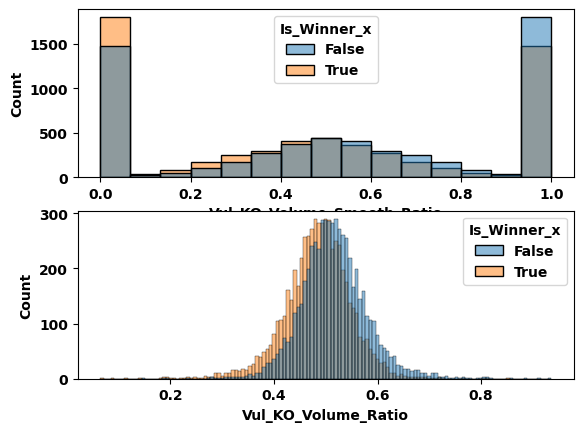

In [21]:
#Engineer new feature relating strikes absorbed per minute with opponents striking volume and wins by ko % 
newfeat1 = newfeat[["Date", "Fighter", "Opponent", "SApM:_x", "Opponent_Wins_By_KO_%", "SLpM:_x", "SApM:_y", "Fighter_Wins_By_KO_%", "SLpM:_y", "Fighter_Loss_By_KO_%", "Opponent_Loss_By_KO_%", "Is_Winner_x"]] #columns needed
newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume_Smooth"] = np.log1p(newfeat1["SApM:_x"] * (newfeat1["Opponent_Wins_By_KO_%"] + 1e-3) * newfeat1["SLpM:_y"]  * (newfeat1["Fighter_Loss_By_KO_%"] + 1e-3))
newfeat1["Opp_Vulnerability_vs_Fighter_KO_Volume_Smooth"] = np.log1p(newfeat1["SApM:_y"] * (newfeat1["Fighter_Wins_By_KO_%"] + 1e-3) * newfeat1["SLpM:_x"]  * (newfeat1["Opponent_Loss_By_KO_%"] + 1e-3))
newfeat1["Vul_KO_Volume_Smooth_Ratio"] = newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume_Smooth"]/ (newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume_Smooth"] + newfeat1["Opp_Vulnerability_vs_Fighter_KO_Volume_Smooth"])
fig, ax = plt.subplots(2)
sns.histplot(data = newfeat1, x = "Vul_KO_Volume_Smooth_Ratio", hue = "Is_Winner_x", ax = ax[0])

newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume"] = np.log1p(newfeat1["SApM:_x"] * (newfeat1["Opponent_Wins_By_KO_%"] + 1) * newfeat1["SLpM:_y"]  * (newfeat1["Fighter_Loss_By_KO_%"] + 1))
newfeat1["Opp_Vulnerability_vs_Fighter_KO_Volume"] = np.log1p(newfeat1["SApM:_y"] * (newfeat1["Fighter_Wins_By_KO_%"] + 1) * newfeat1["SLpM:_x"]  * (newfeat1["Opponent_Loss_By_KO_%"] + 1))
newfeat1["Vul_KO_Volume_Ratio"] = newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume"]/ (newfeat1["Fighter_Vulnerability_vs_Opp_KO_Volume"] + newfeat1["Opp_Vulnerability_vs_Fighter_KO_Volume"])
sns.histplot(data = newfeat1, x = "Vul_KO_Volume_Ratio", hue = "Is_Winner_x", ax = ax[1])


<Axes: >

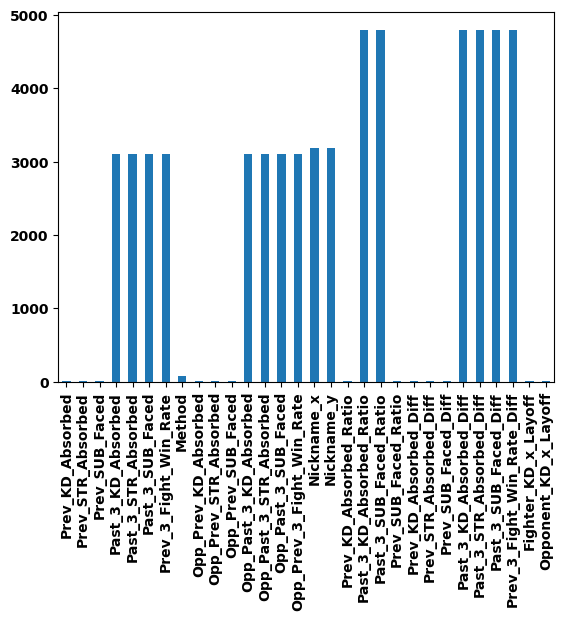

In [23]:
null_values = newfeat.isna().sum()
null_values = null_values[null_values > 0]
null_values.plot(kind = "bar") 

In [26]:
#merge the new features to the train, val and test sets
train = pd.merge(left = train, right = newfeat1[["Vul_KO_Volume_Smooth_Ratio", "Vul_KO_Volume_Ratio", "Date", "Fighter", "Opponent"]], on = ["Date", "Fighter", "Opponent"], how = "left")
val = pd.merge(left = val, right = newfeat1[["Vul_KO_Volume_Smooth_Ratio", "Vul_KO_Volume_Ratio", "Date", "Fighter", "Opponent"]], on = ["Date", "Fighter", "Opponent"],  how = "left")
test = pd.merge(left = test, right = newfeat1[["Vul_KO_Volume_Smooth_Ratio", "Vul_KO_Volume_Ratio", "Date", "Fighter", "Opponent"]], on = ["Date", "Fighter", "Opponent"],  how = "left")

C:\Users\alexz\AppData\Local\Temp\ipykernel_29024\1321166888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfeat2["Fighter_Getting_Sub_Risk_Norm"] = np.log1p((newfeat2["Fighter_Loss_By_SUB_%"] + smooth) * (newfeat2["TD Acc.:_y"] + smooth) * (newfeat2["Sub. Avg.:_y"] + smooth) * (1/(newfeat2["TD Def.:_x"] + smooth)))
C:\Users\alexz\AppData\Local\Temp\ipykernel_29024\1321166888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newfeat2["Opponent_Getting_Sub_Risk_Norm"] = np.log1p((newfeat2["Opponent

<Axes: xlabel='Sub_Risk_Ratio', ylabel='Count'>

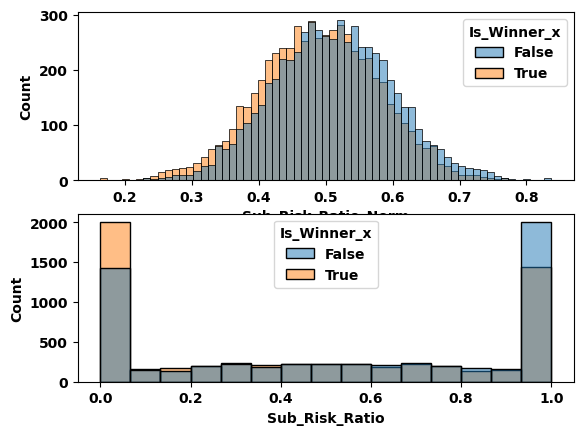

In [30]:
#Feature 2: Relationship between fighter sub average and their opponents risk of being subbed (TD Defense, losses by sub)
fig, ax = plt.subplots(2)
smooth = 1
newfeat2 = newfeat[["Sub. Avg.:_x", "Sub. Avg.:_y", "TD Acc.:_x", "TD Acc.:_y", "Fighter_Loss_By_SUB_%", "Opponent_Loss_By_SUB_%", "Is_Winner_x", "Method", "Date", "Fighter", "Opponent", "TD Def.:_x", "TD Def.:_y"]]
newfeat2["Fighter_Getting_Sub_Risk_Norm"] = np.log1p((newfeat2["Fighter_Loss_By_SUB_%"] + smooth) * (newfeat2["TD Acc.:_y"] + smooth) * (newfeat2["Sub. Avg.:_y"] + smooth) * (1/(newfeat2["TD Def.:_x"] + smooth)))
newfeat2["Opponent_Getting_Sub_Risk_Norm"] = np.log1p((newfeat2["Opponent_Loss_By_SUB_%"] + smooth) * (newfeat2["TD Acc.:_x"] + smooth) * (newfeat2["Sub. Avg.:_x"] + smooth)* (1/(newfeat2["TD Def.:_y"] + smooth)))
newfeat2["Sub_Risk_Ratio_Norm"] = newfeat2["Fighter_Getting_Sub_Risk_Norm"] / (newfeat2["Fighter_Getting_Sub_Risk_Norm"] + newfeat2["Opponent_Getting_Sub_Risk_Norm"])
sns.histplot(data = newfeat2, x = "Sub_Risk_Ratio_Norm", hue = "Is_Winner_x", ax = ax[0])
smooth = 1e-6
newfeat2["Fighter_Getting_Sub_Risk"] = np.log1p((newfeat2["Fighter_Loss_By_SUB_%"] + smooth) * (newfeat2["TD Acc.:_y"] + smooth) * (newfeat2["Sub. Avg.:_y"] + smooth) * (1/(newfeat2["TD Def.:_x"] + smooth)))
newfeat2["Opponent_Getting_Sub_Risk"] = np.log1p((newfeat2["Opponent_Loss_By_SUB_%"] + smooth) * (newfeat2["TD Acc.:_x"] + smooth) * (newfeat2["Sub. Avg.:_x"] + smooth)* (1/(newfeat2["TD Def.:_y"] + smooth)))
newfeat2["Sub_Risk_Ratio"] = newfeat2["Fighter_Getting_Sub_Risk"] / (newfeat2["Fighter_Getting_Sub_Risk"] + newfeat2["Opponent_Getting_Sub_Risk"])
sns.histplot(data = newfeat2, x = "Sub_Risk_Ratio", hue = "Is_Winner_x", ax = ax[1])

In [32]:
newfeat2[newfeat2["Sub. Avg.:_x"].isna()]

,Sub. Avg.:_x,Sub. Avg.:_y,TD Acc.:_x,TD Acc.:_y,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Is_Winner_x,Method,Date,Fighter,Opponent,TD Def.:_x,TD Def.:_y,Fighter_Getting_Sub_Risk_Norm,Opponent_Getting_Sub_Risk_Norm,Sub_Risk_Ratio_Norm,Fighter_Getting_Sub_Risk,Opponent_Getting_Sub_Risk,Sub_Risk_Ratio


In [34]:
newfeat2.isna().sum()

Sub. Avg.:_x                       0
Sub. Avg.:_y                       0
TD Acc.:_x                         0
TD Acc.:_y                         0
Fighter_Loss_By_SUB_%              0
Opponent_Loss_By_SUB_%             0
Is_Winner_x                        0
Method                            80
Date                               0
Fighter                            0
Opponent                           0
TD Def.:_x                         0
TD Def.:_y                         0
Fighter_Getting_Sub_Risk_Norm      0
Opponent_Getting_Sub_Risk_Norm     0
Sub_Risk_Ratio_Norm                0
Fighter_Getting_Sub_Risk           0
Opponent_Getting_Sub_Risk          0
Sub_Risk_Ratio                     0
dtype: int64

In [36]:
#merge the new features to the train, val and test sets
train = pd.merge(left = train, right = newfeat2[["Sub_Risk_Ratio","Date", "Fighter", "Opponent", "Sub_Risk_Ratio_Norm"]], on = ["Date", "Fighter", "Opponent"], how = "left")
val = pd.merge(left = val, right = newfeat2[["Sub_Risk_Ratio", "Date", "Fighter", "Opponent", "Sub_Risk_Ratio_Norm"]], on = ["Date", "Fighter", "Opponent"],  how = "left")
test = pd.merge(left = test, right = newfeat2[["Sub_Risk_Ratio", "Date", "Fighter", "Opponent", "Sub_Risk_Ratio_Norm"]], on = ["Date", "Fighter", "Opponent"],  how = "left")

In [38]:
#Feature 3: Add total win difference, this will help account for experience as well.

In [40]:
for df in [train, val, test]:
    df.drop(columns = [col for col in df.columns if "Prev_KD_Absorbed" in col], axis=1, inplace=True)

In [42]:
prevkd

,Unnamed: 0,Date,Fighter,Opponent,Prev_KD_Absorbed_Ratio
0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,1.0
1,1,2025-07-26,Davey Grant,Da'Mon Blackshear,1.0
2,2,2025-07-26,Muslim Salikhov,Carlos Leal,1.0
3,3,2025-07-26,Amanda Ribas,Tabatha Ricci,1.0
4,4,2025-07-26,Bogdan Guskov,Nikita Krylov,0.5
...,...,...,...,...,...
11927,11997,2000-09-22,Jeremy Horn,Eugene Jackson,1.0
11928,11998,2000-06-09,Pedro Rizzo,Kevin Randleman,0.5
11929,11999,2000-06-09,Kevin Randleman,Pedro Rizzo,2.0
11930,12000,2000-04-14,Tito Ortiz,Wanderlei Silva,1.0


In [43]:
colsold = list(set(['Fighter_Grappling_vs_OppTDD_Bin',
 'Overall_Stat_Interactions_Bin',
 'Overall_Stat_Interactions_Fighter_Bin',
 'Current_Win_Streak_Bins',
 'Str_Danger_vs_Opp_StrDef',
 'Striking_Ratio',
 'Grappling_Ratio',
 'Overall_Win_%_Bin',
 'TDD_vs_Opp_Grappling_Bin',
 'StrDef_vs_OppStrDanger_Bin',
 'Ape_Ratio_Bins',
 'Ape_Ratio_Comparison',
 'KD_Layoff_Bins',
 'KD_x_Layoff_Relationship',
 'Fight_Style_Matchup_BJJ_vs_BJJ',
 'Fight_Style_Matchup_BJJ_vs_Balanced/Mid',
 'Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_BJJ_vs_OffensiveGrappler',
 'Fight_Style_Matchup_Balanced/Mid_vs_BJJ',
 'Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid',
 'Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler',
 'Fight_Style_Matchup_OffensiveGrappler_vs_BJJ',
 'Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid',
 'Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD',
 'Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler',
 'Weight_class_lbs_125 lbs.',
 'Weight_class_lbs_135 lbs.',
 'Weight_class_lbs_145 lbs.',
 'Weight_class_lbs_155 lbs.',
 'Weight_class_lbs_170 lbs.',
 'Weight_class_lbs_185 lbs.',
 'Weight_class_lbs_205 lbs.',
 'Weight_class_lbs_265 lbs.',
 'Fighter_Grappling_vs_OppTDD',
 'Str_Danger_vs_Opp_StrDef',
 'TDD_vs_Opp_Grappling',
 'StrDef_vs_Opp_Str_Danger', "Overall_Win_%_Diff", "TD_Acc_x_Avg_SUB_Style", "Overall_Stat_Interactions", "Overall_Stat_Interactions_Fighter", 'Volume_x_Accuracy_Style', "Current_Win_Streak_Comparison", "Current_Win_Streak_Diff"]))

In [47]:
for df in [train, val, test, prevkd]:
    df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True)
    df.drop(columns = [col for col in df.columns if "key" in col], inplace=True )
    

In [49]:
#merge the fixed prev_kd fixed column with the existing data:
# train.drop("Prev_KD_Absorbed_Ratio", axis=1, inplace=True)
# val.drop("Prev_KD_Absorbed_Ratio", axis=1, inplace=True)
# test.drop("Prev_KD_Absorbed_Ratio", axis=1, inplace=True)
train = pd.merge(left = train, right = prevkd, on = ["Date", "Fighter", "Opponent"], how = "left")
val = pd.merge(left = val, right = prevkd, on = ["Date", "Fighter", "Opponent"], how = "left")
test = pd.merge(left = test, right = prevkd, on = ["Date", "Fighter", "Opponent"], how = "left")

In [51]:
val

,index,Date,Fighter,Opponent,Closed_Stance,Weight_class_lbs,Is_Winner_x,Method,Prev_3_Stats_Missing,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,TD Avg.:_Style,SLpM:_Style,Sub. Avg.:_Style,TD Acc.:_Style,TD_Acc_x_Avg_SUB_Style,SApM:_Style,Grappling_Threat_Style,Str. Acc.:_Style,TD Def.:_Style,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str. Def:_Style,Volume_x_Accuracy_Style,Current_Win_Streak_Comparison,Volume_x_Accuracy_x_KO%_Style,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,SLpM_Bin,VolumeAcc_Bin,SApM_Bin,Overall_Stat_Interactions,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions_Fighter,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Current_Win_Streak_Bins,Wins_By_KO_%_Bins,StrDef_vs_OppStrDanger_Bin,TDD_vs_Opp_Grappling_Bin,Overall_Stat_Interactions_Bin,Str_Danger_vs_Opp_StrDef_Bin,Fighter_Grappling_vs_OppTDD_Bin,Overall_Stat_Interactions_Fighter_Bin,Overall_Win_%_Bin,Striking_Ratio,Grappling_Ratio,KD_x_Layoff_Relationship,KD_Layoff_Bins,Fight Style_x,Ape_Ratio_x,BMI_x,Fighter_y,Fight Style_y,Ape_Ratio_y,BMI_y,Ape_Ratio_Comparison,BMI_Ratio_Comparison,Ape_Ratio_Bins,Fight_Style_Matchup,Fight_Style_Matchup_BJJ_vs_BJJ,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Vul_KO_Volume_Smooth_Ratio,Vul_KO_Volume_Ratio,Sub_Risk_Ratio,Sub_Risk_Ratio_Norm,Prev_KD_Absorbed_Ratio
0,1,2024-02-17,Paulo Costa,Robert Whittaker,True,185 lbs.,False,DEC,False,-11.0,0.0,-0.333333,40.666667,0.000000,322.0,1.0,0.000000,-9.0,-3.0,-1.0,0.0,-8.0,-2.0,0.0,-1.0,0.333333,0.000000,-0.333333,-0.100000,0.0000,0.100000,1.0,0.000000,1.68,0.15,3.15,-0.10,-0.44,0.37,-0.01,0.0,1.0,-1.0,0.80,1.00,1.0,0.750000,0.750000,0.310345,0.578067,0.000000,0.663716,0.470382,0.657974,0.000000,0.574257,0.496894,0.223942,1.289665,0.453703,0.648872,0.999999,0.787050,0.983051,0.414365,3.0,3.0,3.0,1.356497,0.151470,1.386292,1.426364,5.637231,3.467159,1.0,2.0,1.0,3.0,2.0,0.0,3.0,3.0,0.0,0.907635,0.657675,0.619177,2.0,DangerousStriking/TDD,0.986301,24.407537,Robert Whittaker,DangerousStriking/TDD,1.013889,25.090233,0.493104,0.493104,-1.0,DangerousStriking/TDD_vs_DangerousStriking/TDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.442781,0.503119,3.390618e-01,0.456910,0.5
1,6,2024-06-22,Ikram Aliskerov,Robert Whittaker,False,185 lbs.,False,KO,True,-55.0,0.0,NaN,NaN,NaN,119.0,0.0,NaN,-14.0,-5.0,

In [53]:
# train.to_csv("train.csv")
# val.to_csv("val.csv")
# test.to_csv("test.csv")

In [54]:
train

,Date,Fighter,Opponent,Closed_Stance,Weight_class_lbs,Is_Winner_x,Method,Prev_3_Stats_Missing,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,TD Avg.:_Style,SLpM:_Style,Sub. Avg.:_Style,TD Acc.:_Style,TD_Acc_x_Avg_SUB_Style,SApM:_Style,Grappling_Threat_Style,Str. Acc.:_Style,TD Def.:_Style,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str. Def:_Style,Volume_x_Accuracy_Style,Current_Win_Streak_Comparison,Volume_x_Accuracy_x_KO%_Style,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,SLpM_Bin,VolumeAcc_Bin,SApM_Bin,Overall_Stat_Interactions,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions_Fighter,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Current_Win_Streak_Bins,Wins_By_KO_%_Bins,StrDef_vs_OppStrDanger_Bin,TDD_vs_Opp_Grappling_Bin,Overall_Stat_Interactions_Bin,Str_Danger_vs_Opp_StrDef_Bin,Fighter_Grappling_vs_OppTDD_Bin,Overall_Stat_Interactions_Fighter_Bin,Overall_Win_%_Bin,Striking_Ratio,Grappling_Ratio,KD_x_Layoff_Relationship,KD_Layoff_Bins,Fight Style_x,Ape_Ratio_x,BMI_x,Fighter_y,Fight Style_y,Ape_Ratio_y,BMI_y,Ape_Ratio_Comparison,BMI_Ratio_Comparison,Ape_Ratio_Bins,Fight_Style_Matchup,Fight_Style_Matchup_BJJ_vs_BJJ,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Vul_KO_Volume_Smooth_Ratio,Vul_KO_Volume_Ratio,Sub_Risk_Ratio,Sub_Risk_Ratio_Norm,Prev_KD_Absorbed_Ratio
0,2022-09-03,Marvin Vettori,Robert Whittaker,False,185 lbs.,False,DEC,False,84.0,0.0,-0.333333,34.000000,0.0,112.0,1.0,0.000000,-5.0,-1.0,-5.0,2.0,-2.0,-2.0,0.0,1.0,-0.357143,0.222222,0.134921,-0.500000,0.000000,0.500000,1.0,-0.027778,0.00,0.03,0.96,-0.03,0.71,0.07,-0.12,0.4,0.0,1.0,0.75,1.0,1.0,0.750000,0.777778,0.653679,0.500000,0.999998,0.542168,0.732040,0.561697,0.999993,0.516853,0.460000,0.252202,1.184707,0.486956,0.516854,0.999999,0.000000,0.779661,0.248619,2.0,2.0,2.0,1.268801,0.248821,0.680728,0.814403,5.089794,3.904027,1.0,-2.0,1.0,3.0,2.0,1.0,2.0,1.0,-1.0,0.699917,1.008087,0.565921,2.0,OffensiveGrappler,1.027778,25.090233,Robert Whittaker,DangerousStriking/TDD,1.013889,25.090233,0.503401,0.500000,1.0,OffensiveGrappler_vs_DangerousStriking/TDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.478189,0.510916,2.478249e-06,0.442481,0.5
1,2014-02-22,Stephen Thompson,Robert Whittaker,True,170 lbs.,True,KO,False,-71.0,0.0,-0.333333,-22.333333,0.0,-24.0,1.0,0.000000,1.0,0.0,1.0,0

In [57]:
cols = list(imp_df["feature"]) + ["Vul_KO_Volume_Ratio"]
# cols = ['Grappling_Ratio',
#  'Striking_Ratio',
#  'Ape_Ratio_Comparison',
#  'SApM:_Diff',
#  'TD Def.:_Diff',
#  'Volume_x_Accuracy_Style',
#  'TD Acc.:_Diff',
#  'SApM:_Style',
#  'Overall_Win_%_Diff',
#  'SLpM:_Style',
#  'Vul_KO_Volume_Ratio',
#  'Days_Since_Last_Fight_Diff',
#  'KD_x_Layoff_Relationship',
#  'Vul_KO_Volume_Ratio']

NameError: name 'imp_df' is not defined

In [1545]:
cols = ['Grappling_Ratio',
 'Striking_Ratio',
 'Ape_Ratio_Comparison',
 'Volume_x_Accuracy_Style',
 'Overall_Win_%_Diff',
 'Days_Since_Last_Fight_Diff',
 'KD_x_Layoff_Relationship',
 'Vul_KO_Volume_Ratio', "Sub_Risk_Ratio"]


In [1762]:
cols = ['Striking_Ratio',
 'Grappling_Ratio',
 'Vul_KO_Volume_Ratio',
 'Sub_Risk_Ratio',
 'Ape_Ratio_Comparison',
 'Overall_Stat_Interactions_Fighter',
 'Overall_Win_%_Diff',
 'Overall_Stat_Interactions',
 'Fighter_Grappling_vs_OppTDD',
 'Volume_x_Accuracy_Style',
 'Days_Since_Last_Fight_Diff',
 'StrDef_vs_Opp_Str_Danger',
 'TDD_vs_Opp_Grappling',
 'Str_Danger_vs_Opp_StrDef',
 'KD_x_Layoff_Relationship',
 'TD_Acc_x_Avg_SUB_Style']

In [1764]:
X_train = train[cols]
y_train = train["Is_Winner_x"]

X_val = val[cols]
y_val = val["Is_Winner_x"]

X_test = test[cols]
y_test = test["Is_Winner_x"]

In [1766]:
X_train

,Striking_Ratio,Grappling_Ratio,Vul_KO_Volume_Ratio,Sub_Risk_Ratio,Ape_Ratio_Comparison,Overall_Stat_Interactions_Fighter,Overall_Win_%_Diff,Overall_Stat_Interactions,Fighter_Grappling_vs_OppTDD,Volume_x_Accuracy_Style,Days_Since_Last_Fight_Diff,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str_Danger_vs_Opp_StrDef,KD_x_Layoff_Relationship,TD_Acc_x_Avg_SUB_Style
0,0.699917,1.008087,0.510916,2.478249e-06,0.503401,0.814403,-0.027778,1.268801,0.680728,0.516854,112.0,0.252202,1.184707,0.248821,0.565921,0.732040
1,0.635324,0.383221,0.490871,5.826234e-01,0.506757,2.431741,0.083333,1.208654,2.403515,0.488310,-24.0,0.244209,1.122447,0.275124,0.489419,0.209362
2,0.622154,0.900994,0.537926,3.664259e-06,0.510252,0.966315,-0.333333,1.283699,0.817152,0.453502,91.0,0.267999,1.194717,0.310566,0.572401,0.678238
3,0.582466,0.691231,0.485808,8.168345e-01,0.503695,1.194713,-0.201389,1.163109,1.071529,0.441207,-112.0,0.256174,1.067427,0.324088,0.425040,0.581214
4,0.551483,0.571614,0.530806,5.937497e-01,0.499953,1.755966,0.060606,1.372753,1.684145,0.429648,-57.0,0.248213,1.298682,0.337327,0.463996,0.377813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,1.204201,3.278281,0.518335,1.220777e-06,0.509804,0.697866,-0.500000,13.217677,0.517728,0.727273,70.0,0.667829,13.217675,0.286118,0.565474,0.999999
9528,1.715679,16.335561,0.369237,9.008046e-18,0.506849,0.105388,0.000000,12.429223,0.000000,0.664758,371.0,0.480622,12.429220,0.105388,0.600835,0.999999
9529,1.187762,1.484877,0.498708,9.999967e-01,0.496644,0.571240,-0.333333,1.382817,0.294455,0.713328,161.0,0.812320,1.005395,0.356322,0.593220,0.776185
9530,1.694093,5.865027,0.200100,5.555636e-08,0.500000,0.412124,0.000000,13.199335,0.037551,0.853736,-203.0,1.716530,13.199326,0.386456,0.538602,1.000000


In [1768]:
def evaluate(actual, pred):
    print("Accuracy:", accuracy_score(actual, pred))
    print("F1 Score:", f1_score(actual, pred))
    print("\nClassification Report:\n", classification_report(actual, pred))
    print("\nConfusion Matrix:\n", confusion_matrix(actual, pred))

In [1770]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# 1. Define model
xgb = XGBClassifier(
    n_estimators=200,        # number of trees
    learning_rate=0.025,      # shrinkage
    max_depth=7,             # tree depth
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    n_jobs=-1,               # use all cores
    eval_metric="logloss"    # avoids warnings
)

# 2. Train on training set
xgb.fit(X_train, y_train)

# 3. Predictions
y_pred = xgb.predict(X_val)


In [1771]:
evaluate(y_val, y_pred)

Accuracy: 0.6885964912280702
F1 Score: 0.6881405563689604

Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.69      0.69       342
        True       0.69      0.69      0.69       342

    accuracy                           0.69       684
   macro avg       0.69      0.69      0.69       684
weighted avg       0.69      0.69      0.69       684


Confusion Matrix:
 [[236 106]
 [107 235]]


In [1774]:
train_pred = xgb.predict(X_train)
evaluate(y_train, train_pred)

Accuracy: 0.8174569869911876
F1 Score: 0.8172268907563025

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.82      0.82      4766
        True       0.82      0.82      0.82      4766

    accuracy                           0.82      9532
   macro avg       0.82      0.82      0.82      9532
weighted avg       0.82      0.82      0.82      9532


Confusion Matrix:
 [[3902  864]
 [ 876 3890]]


In [1812]:
y_proba = xgb.predict_proba(X_val)[:, 1]
y_proba

array([0.49712932, 0.7758183 , 0.73810214, 0.40613437, 0.4092975 ,
       0.722226  , 0.52856326, 0.52408814, 0.3638185 , 0.62515616,
       0.39645085, 0.5958206 , 0.55102   , 0.5230426 , 0.6119447 ,
       0.463886  , 0.14680335, 0.24980369, 0.29804307, 0.23484781,
       0.31230325, 0.47828588, 0.25566185, 0.27394292, 0.4529429 ,
       0.37969115, 0.4095513 , 0.58201146, 0.6442753 , 0.51888096,
       0.60883564, 0.48675314, 0.52689105, 0.52128595, 0.6565278 ,
       0.40926355, 0.4023344 , 0.3990593 , 0.5626432 , 0.4927543 ,
       0.79940945, 0.4187459 , 0.645096  , 0.4117874 , 0.5056472 ,
       0.37366083, 0.28769088, 0.22952631, 0.63261265, 0.64305663,
       0.73485345, 0.27779546, 0.63165534, 0.40377465, 0.37057185,
       0.49436995, 0.7301934 , 0.68848044, 0.49849665, 0.24518493,
       0.37478524, 0.47155887, 0.27976605, 0.42785075, 0.32167172,
       0.5290927 , 0.5963068 , 0.65862036, 0.10467897, 0.568122  ,
       0.39803585, 0.4347412 , 0.64287317, 0.5078205 , 0.55368

In [1776]:
# #SHAP values: How much a feature influences the prediction essentially whether it is regression or classification
# !pip install shap



In [1778]:
import shap

In [1780]:
shap.initjs()

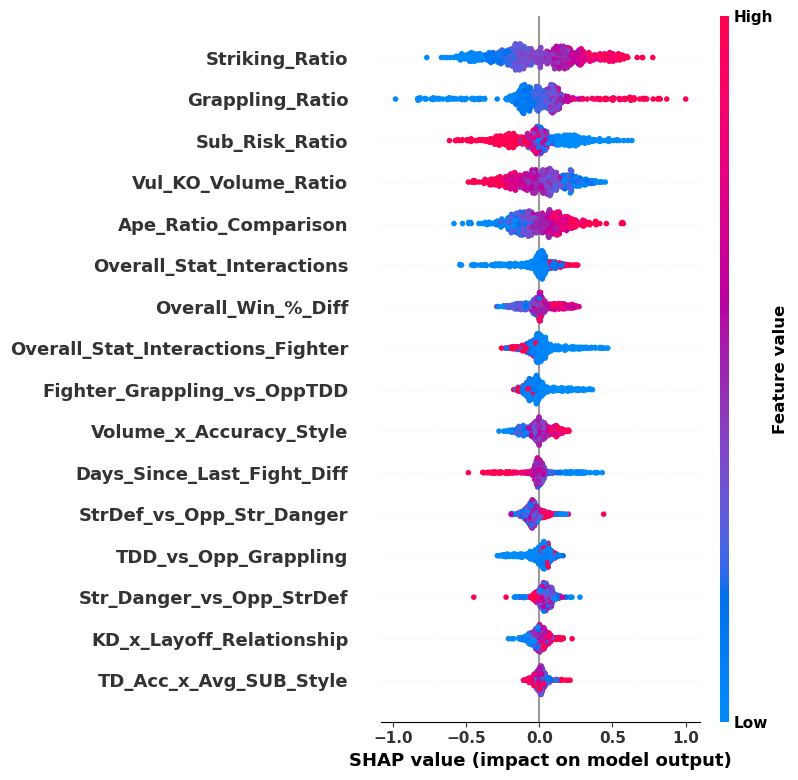

In [1782]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)

In [1784]:

# mean absolute contribution of each feature across the evaluation set
mean_abs = np.abs(shap_values).mean(axis=0)
imp_df = (pd.DataFrame({"feature": cols,
                        "mean_abs_shap": mean_abs})
          .sort_values("mean_abs_shap", ascending=False)
          .reset_index(drop=True))
# cols = list(imp_df.head(13)["feature"])
cols = list(imp_df.head(16)["feature"])
imp_df.head(20)


,feature,mean_abs_shap
0,Striking_Ratio,0.231860
1,Grappling_Ratio,0.163284
2,Sub_Risk_Ratio,0.158832
3,Vul_KO_Volume_Ratio,0.147953
4,Ape_Ratio_Comparison,0.134406
5,Overall_Stat_Interactions,0.073709
6,Overall_Win_%_Diff,0.072916
7,Overall_Stat_Interactions_Fighter,0.067588
8,Fighter_Grappling_vs_OppTDD,0.064347
9,Volume_x_Accuracy_Style,0.063025


In [1826]:
shap_row_value = explainer(X_val.iloc[[1]])

In [1828]:
shap.plots.force(explainer.expected_value, shap_row_value.values, X_val.iloc[1])

In [273]:
test[["Prev_KD_Absorbed_Ratio"]]

,Prev_KD_Absorbed_Ratio
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
405,2.0
406,1.0
407,1.0
408,1.0


In [1824]:
val["Val_Preds"] = y_pred
val["Val_Proba"] = y_proba

val["Is_Winner_easy_comp"] = val["Is_Winner_x"].astype("int")
val[(val["Fighter"] == "Robert Whittaker") | (val["Opponent"] == "Robert Whittaker")]

,index,Date,Fighter,Opponent,Closed_Stance,Weight_class_lbs,Is_Winner_x,Method,Prev_3_Stats_Missing,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,TD Avg.:_Style,SLpM:_Style,Sub. Avg.:_Style,TD Acc.:_Style,TD_Acc_x_Avg_SUB_Style,SApM:_Style,Grappling_Threat_Style,Str. Acc.:_Style,TD Def.:_Style,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str. Def:_Style,Volume_x_Accuracy_Style,Current_Win_Streak_Comparison,Volume_x_Accuracy_x_KO%_Style,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,SLpM_Bin,VolumeAcc_Bin,SApM_Bin,Overall_Stat_Interactions,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions_Fighter,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Current_Win_Streak_Bins,Wins_By_KO_%_Bins,StrDef_vs_OppStrDanger_Bin,TDD_vs_Opp_Grappling_Bin,Overall_Stat_Interactions_Bin,Str_Danger_vs_Opp_StrDef_Bin,Fighter_Grappling_vs_OppTDD_Bin,Overall_Stat_Interactions_Fighter_Bin,Overall_Win_%_Bin,Striking_Ratio,Grappling_Ratio,KD_x_Layoff_Relationship,KD_Layoff_Bins,Fight Style_x,Ape_Ratio_x,BMI_x,Fighter_y,Fight Style_y,Ape_Ratio_y,BMI_y,Ape_Ratio_Comparison,BMI_Ratio_Comparison,Ape_Ratio_Bins,Fight_Style_Matchup,Fight_Style_Matchup_BJJ_vs_BJJ,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Vul_KO_Volume_Smooth_Ratio,Vul_KO_Volume_Ratio,Sub_Risk_Ratio,Sub_Risk_Ratio_Norm,Prev_KD_Absorbed_Ratio,Val_Preds,Val_Proba,Is_Winner_easy_comp
0,1,2024-02-17,Paulo Costa,Robert Whittaker,True,185 lbs.,False,DEC,False,-11.0,0.0,-0.333333,40.666667,0.0,322.0,1.0,0.000000,-9.0,-3.0,-1.0,0.0,-8.0,-2.0,0.0,-1.0,0.333333,0.000000,-0.333333,-0.1,0.0,0.1,1.0,0.000000,1.68,0.15,3.15,-0.10,-0.44,0.37,-0.01,0.0,1.0,-1.0,0.800000,1.0,1.0,0.750000,0.750000,0.310345,0.578067,0.000000,0.663716,0.470382,0.657974,0.000000,0.574257,0.496894,0.223942,1.289665,0.453703,0.648872,0.999999,0.787050,0.983051,0.414365,3.0,3.0,3.0,1.356497,0.151470,1.386292,1.426364,5.637231,3.467159,1.0,2.0,1.0,3.0,2.0,0.0,3.0,3.0,0.0,0.907635,0.657675,0.619177,2.0,DangerousStriking/TDD,0.986301,24.407537,Robert Whittaker,DangerousStriking/TDD,1.013889,25.090233,0.493104,0.493104,-1.0,DangerousStriking/TDD_vs_DangerousStriking/TDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.442781,0.503119,3.390618e-01,0.456910,0.5,0,0.497129,0
1,6,2024-06-22,Ikram Aliskerov,Robert Whittaker,False,185 lbs.,False,KO,True,-55.0,0.0

In [1788]:
val[(val["Is_Winner_x"] == True) & (val["Val_Preds"] == 0)]

,index,Date,Fighter,Opponent,Closed_Stance,Weight_class_lbs,Is_Winner_x,Method,Prev_3_Stats_Missing,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,TD Avg.:_Style,SLpM:_Style,Sub. Avg.:_Style,TD Acc.:_Style,TD_Acc_x_Avg_SUB_Style,SApM:_Style,Grappling_Threat_Style,Str. Acc.:_Style,TD Def.:_Style,StrDef_vs_Opp_Str_Danger,TDD_vs_Opp_Grappling,Str. Def:_Style,Volume_x_Accuracy_Style,Current_Win_Streak_Comparison,Volume_x_Accuracy_x_KO%_Style,Str_Acc_vs_Opp_Str_Def,TD_Acc_vs_Opp_TD_Def,SLpM_Bin,VolumeAcc_Bin,SApM_Bin,Overall_Stat_Interactions,Str_Danger_vs_Opp_StrDef,Fighter_Grappling_vs_OppTDD,Overall_Stat_Interactions_Fighter,Fighter_KD_x_Layoff,Opponent_KD_x_Layoff,Current_Win_Streak_Bins,Wins_By_KO_%_Bins,StrDef_vs_OppStrDanger_Bin,TDD_vs_Opp_Grappling_Bin,Overall_Stat_Interactions_Bin,Str_Danger_vs_Opp_StrDef_Bin,Fighter_Grappling_vs_OppTDD_Bin,Overall_Stat_Interactions_Fighter_Bin,Overall_Win_%_Bin,Striking_Ratio,Grappling_Ratio,KD_x_Layoff_Relationship,KD_Layoff_Bins,Fight Style_x,Ape_Ratio_x,BMI_x,Fighter_y,Fight Style_y,Ape_Ratio_y,BMI_y,Ape_Ratio_Comparison,BMI_Ratio_Comparison,Ape_Ratio_Bins,Fight_Style_Matchup,Fight_Style_Matchup_BJJ_vs_BJJ,Fight_Style_Matchup_BJJ_vs_Balanced/Mid,Fight_Style_Matchup_BJJ_vs_DangerousStriking/TDD,Fight_Style_Matchup_BJJ_vs_OffensiveGrappler,Fight_Style_Matchup_Balanced/Mid_vs_BJJ,Fight_Style_Matchup_Balanced/Mid_vs_Balanced/Mid,Fight_Style_Matchup_Balanced/Mid_vs_DangerousStriking/TDD,Fight_Style_Matchup_Balanced/Mid_vs_OffensiveGrappler,Fight_Style_Matchup_DangerousStriking/TDD_vs_BJJ,Fight_Style_Matchup_DangerousStriking/TDD_vs_Balanced/Mid,Fight_Style_Matchup_DangerousStriking/TDD_vs_DangerousStriking/TDD,Fight_Style_Matchup_DangerousStriking/TDD_vs_OffensiveGrappler,Fight_Style_Matchup_OffensiveGrappler_vs_BJJ,Fight_Style_Matchup_OffensiveGrappler_vs_Balanced/Mid,Fight_Style_Matchup_OffensiveGrappler_vs_DangerousStriking/TDD,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Vul_KO_Volume_Smooth_Ratio,Vul_KO_Volume_Ratio,Sub_Risk_Ratio,Sub_Risk_Ratio_Norm,Prev_KD_Absorbed_Ratio,Val_Preds
8,34,2024-11-02,Dustin Stoltzfus,Marc-Andre Barriault,True,185 lbs.,True,KO,False,16.0,0.0,0.333333,-56.333333,0.000000,21.0,0.0,0.000000,-4.0,-2.0,-2.0,0.0,-1.0,0.0,1.0,-3.0,-0.333333,0.333333,0.166667,0.114286,0.257143,-0.371429,0.0,-0.175824,-2.88,-0.02,-2.43,-0.05,2.05,0.16,-0.21,1.2,-1.0,1.0,1.250000,1.000000,1.0,0.285714,0.461538,0.914979,0.342795,0.928571,0.621211,0.957791,0.360505,0.981462,0.489130,0.407079,0.153676,2.141252,0.474747,0.333066,0.000000,0.000000,0.865385,0.245509,0.0,0.0,0.0,2.160583,0.313358,0.393425,0.615218,3.294994,3.819600,0.0,-2.0,0.0,4.0,3.0,2.0,1.0,0.0,-1.0,0.399057,1.862928,0.463132,0.0,OffensiveGrappler,1.041667,25.090233,Marc-Andre Barriault,DangerousStriking/TDD,1.013699,24.407537,0.506804,0.506896,1.0,OffensiveGrappler_vs_DangerousStriking/TDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.996054,0.532230,0.166528,0.418348,1.0,0
25,147,2024-06-22,Kelvin Gastelum,Daniel Rodriguez,True,185 lbs.,True,DEC,False,-9.0,3.0,0.000000,2.3

In [149]:
train[["Is_Winner_x"]].value_counts()

Is_Winner_x
False          4766
True           4766
Name: count, dtype: int64

In [209]:
train.groupby("Prev_KD_Absorbed_Ratio")["Is_Winner_x"].mean()


Prev_KD_Absorbed_Ratio
0.166667    1.000000
0.200000    1.000000
0.250000    0.333333
0.333333    0.527950
0.400000    0.500000
0.500000    0.547933
0.666667    0.487805
1.000000    0.500000
1.500000    0.512195
2.000000    0.452067
2.500000    0.500000
3.000000    0.472050
4.000000    0.666667
5.000000    0.000000
6.000000    0.000000
Name: Is_Winner_x, dtype: float64

In [115]:
train[(train["Prev_KD_Absorbed_Ratio"] == 1.0) & ((train["Fighter_x"] == "Robert Whittaker") | (train["Opponent"] == "Robert Whittaker"))]

,Unnamed: 0.1,key_0,level_0,index,Unnamed: 0_x,Date,Fighter_x,Opponent,Closed_Stance,Weight_class_lbs,...,Fight_Style_Matchup_OffensiveGrappler_vs_OffensiveGrappler,Weight_class_lbs_125 lbs.,Weight_class_lbs_135 lbs.,Weight_class_lbs_145 lbs.,Weight_class_lbs_155 lbs.,Weight_class_lbs_170 lbs.,Weight_class_lbs_185 lbs.,Weight_class_lbs_205 lbs.,Weight_class_lbs_265 lbs.,Prev_KD_Absorbed_Ratio_Flip
0,0,0,0,2,2348.0,2022-09-03,Marvin Vettori,Robert Whittaker,False,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,2,2,4,9050.0,2013-08-28,Court McGee,Robert Whittaker,True,170 lbs.,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,3,3,5,3516.0,2021-04-17,Kelvin Gastelum,Robert Whittaker,False,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,4,4,4,7,7915.0,2015-05-09,Brad Tavares,Robert Whittaker,True,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,5,5,5,8,3877.0,2020-10-24,Jared Cannonier,Robert Whittaker,False,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,9,9,9,13,6728.0,2016-11-26,Derek Brunson,Robert Whittaker,False,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,10,10,10,14,4069.0,2020-07-25,Darren Till,Robert Whittaker,False,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11,11,11,11,15,7511.0,2015-11-14,Uriah Hall,Robert Whittaker,True,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12,12,12,12,16,6442.0,2017-04-15,Jacare Souza,Robert Whittaker,True,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14,14,14,14,18,6276.0,2017-07-08,Yoel Romero,Robert Whittaker,False,185 lbs.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
